# Day 8：综合实践与展示（闭环）

> 今日目标：完成 1 个最小可复现分析项目（6~8 关键单元格），展示数据分析闭环：选题 → 数据 → 清洗 → 探索/可视化 → (可选) 简易模型 → 结论与局限 → 伦理声明。

核心要求：
- 步骤清晰，Notebook 自上而下可一键运行。
- 每个阶段有简短 Markdown 说明。
- 至少 1 张图 + 1 张汇总表。
- 结论客观，注明局限与后续改进。

可选加分：
- 自定义函数封装重复逻辑。
- 使用前几天拓展 (相关性 / 简单回归 / 分组多指标)。
- 图表添加注释 (annotate) 或信息来源。

## 1. 选题建议（任选其一或自拟）
1. 城市空气质量：比较不同区域 PM2.5 指标差异与可能影响因素。
2. 学习打卡：一周（或多周）学习时长/类型分布，寻找效率模式。
3. 简化公共数据：例如你自行整理的体育锻炼 / 食堂满意度抽样。
4. (可选) 在已有空气质量上加入你自建的标签（如工作日/周末）。

提示：小而完整 > 大而空泛。数据行数几十到几百即可。

## 2. 项目结构模板（复制后逐步填）
1. 题目 & 摘要 (50~70 字说明做了什么 + 发现概括)
2. 数据来源 & 字段说明 (表格/列表)
3. 清洗步骤 (列出 2~4 条具体操作：去重/缺失处理/类型转换)
4. 探索分析：关键统计 & 排序 & (可选) 相关
5. 可视化：1~2 张核心图（趋势/比较/关系）
6. (可选) 简易模型或假设验证
7. 结论（3~5 条发现 + 局限 + 改进方向）
8. 数据伦理与责任（1~2 句）
9. 附录（函数 / 额外图表，可选）

## 3. 起步：导入基础库
如需第三方库（除 pandas / matplotlib / sklearn），请提前说明。

In [16]:
# === 1. 导入库 ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# (可选) from sklearn.linear_model import LinearRegression
# (可选) from sklearn.model_selection import train_test_split
# 设置显示选项
pd.set_option('display.max_columns', 20)

## 4. 题目 & 摘要 (示例占位)
在这里写：本项目分析 XXX 数据，关注的问题是…… 预期输出…… 初步发现……

In [17]:
# === 2. 载入数据 (示例使用课程内空气质量 + 城市信息，可替换成你自己的) ===
# 如果你有自建 CSV，把路径改成你的文件
air = pd.read_csv('../data/air_quality_timeseries.csv', parse_dates=['date'])
city_info = pd.read_csv('../data/city_info.csv')
print('air 行列:', air.shape, ' city_info 行列:', city_info.shape)
air.head()

air 行列: (30, 7)  city_info 行列: (12, 5)


,date,city,province,PM25,PM10,NO2,SO2
0,2025-09-01,广州,广东,42,55,19,7
1,2025-09-02,广州,广东,41,54,18,7
2,2025-09-03,广州,广东,39,50,17,6
3,2025-09-04,广州,广东,45,57,20,7
4,2025-09-05,广州,广东,44,56,19,7


### 字段说明 (请自行补充/修改)
| 字段 | 含义 | 单位/类型 |
|------|------|-----------|
| date | 日期 | datetime |
| city | 城市名称 | str |
| PM25 | PM2.5 浓度 | μg/m³ |
| PM10 | PM10 浓度 | μg/m³ |
| NO2 | 二氧化氮 | μg/m³ |
| SO2 | 二氧化硫 | μg/m³ |
| population_million | 人口 (百万) | float |
| region | 区域 | str |
(如有新增列请补充)

## 5. 清洗步骤 (示例：去重/缺失/类型)
列出你做的每一步 + 一行代码 + 一句说明。

In [18]:
# === 3. 数据清洗示例 ===
# 合并城市信息
df = pd.merge(air, city_info, on='city', how='left')
# 检查缺失
missing_summary = df.isnull().sum()
missing_summary[missing_summary>0]

Series([], dtype: int64)

In [19]:
# 示例：如果没有缺失，可以写说明；若有，展示处理代码 (此处占位)
# df['某列'] = df['某列'].fillna(df['某列'].mean())  # 示例
# 去重 (若有重复)
dup_count = df.duplicated().sum()
dup_count

0

## 6. 衍生指标 (根据选题自定)
示例：人均 PM2.5 / PM10-PM25 差值 / 高污染天 flag。

In [20]:
# === 4. 衍生字段示例 ===
df['PM_diff'] = df['PM10'] - df['PM25']
df['PM25_per_million'] = df['PM25'] / df['population_million']
df['high_flag'] = (df['PM25'] > 55).astype(int)
df.head()

,date,city,province_x,PM25,PM10,NO2,SO2,province_y,region,population_million,area_km2,PM_diff,PM25_per_million,high_flag
0,2025-09-01,广州,广东,42,55,19,7,广东,华南,18.7,7434,13,2.245989,0
1,2025-09-02,广州,广东,41,54,18,7,广东,华南,18.7,7434,13,2.192513,0
2,2025-09-03,广州,广东,39,50,17,6,广东,华南,18.7,7434,11,2.085561,0
3,2025-09-04,广州,广东,45,57,20,7,广东,华南,18.7,7434,12,2.406417,0
4,2025-09-05,广州,广东,44,56,19,7,广东,华南,18.7,7434,12,2.352941,0


## 7. 探索性分析 (统计/排序/分组)
请围绕你的问题：示例——比较区域平均、城市排名、差值分布。

In [21]:
# === 5. 统计示例 ===
region_stats = df.groupby('region')['PM25'].mean().sort_values(ascending=False)
region_stats

region
华北    62.2
西南    57.3
华南    42.2
华东    42.0
Name: PM25, dtype: float64

In [22]:
# 城市层面示例
city_pm25 = df.groupby('city')['PM25'].mean().sort_values(ascending=False).head(10)
city_pm25

city
北京    62.2
成都    59.2
重庆    55.4
上海    45.0
广州    42.2
杭州    39.0
Name: PM25, dtype: float64

### (可选) 相关性
若与你的选题相关，可计算相关矩阵并挑 1~2 个值得解释的关系。

In [23]:
corr = df[['PM25','PM10','NO2','SO2']].corr()
corr

,PM25,PM10,NO2,SO2
PM25,1.000000,0.993589,0.920408,0.928219
PM10,0.993589,1.000000,0.951858,0.944910
NO2,0.920408,0.951858,1.000000,0.959213
SO2,0.928219,0.944910,0.959213,1.000000


## 8. 可视化 (核心 1~2 张图)
挑最能支撑你结论的图。保持整洁：标题 / 轴标签 / 单位 / 图例。

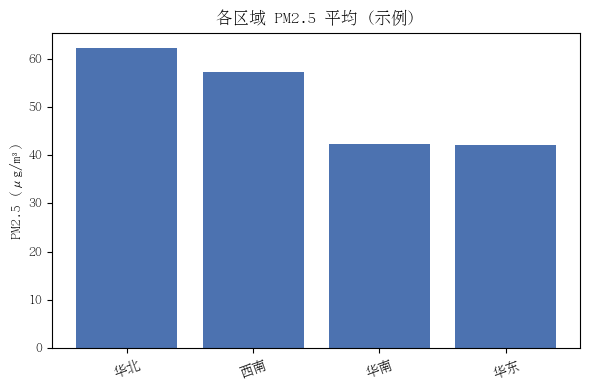

In [24]:
# === 6. 图表示例 1：区域 PM2.5 平均柱状 ===
plt.figure(figsize=(6,4))
# 修正中文显示
plt.rcParams['font.sans-serif'] = ['AR PL UMing CN']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(region_stats.index, region_stats.values, color='#4C72B0')
plt.title('各区域 PM2.5 平均 (示例)')
plt.ylabel('PM2.5 (μg/m³)')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

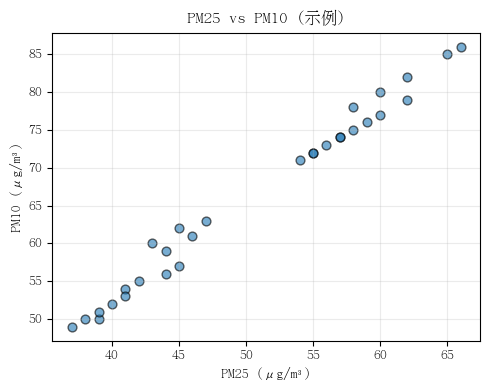

In [25]:
# === 7. 图表示例 2：PM25 vs PM10 散点 (示例) ===
plt.figure(figsize=(5,4))
plt.scatter(df['PM25'], df['PM10'], alpha=0.6, edgecolor='k', s=40)
plt.title('PM25 vs PM10 (示例)')
plt.xlabel('PM25 (μg/m³)')
plt.ylabel('PM10 (μg/m³)')
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

## 9. (可选) 简易模型 / 假设验证
示例：利用上一日 PM25_lag1 预测今日 PM25，或建立高污染分类基线。仅在你时间允许时尝试。

In [28]:
# === 8. (可选) 简单回归骨架 ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = df.sort_values(['city','date'])
df['PM25_lag1'] = df.groupby('city')['PM25'].shift(1)
model_df = df.dropna(subset=['PM25_lag1'])
X = model_df[['PM10','NO2','SO2','PM25_lag1']]
y = model_df['PM25']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
reg = LinearRegression().fit(X_train,y_train)
print('R^2:', reg.score(X_test,y_test))
# (本节可删除如果不做模型)

R^2: 0.9816988260300709


## 10. 结论 (请用要点列出)
示例格式：
1. 发现 1：描述 + 数据支撑 (引用统计或图)。
2. 发现 2：……
3. 发现 3：……
4. 局限：时间范围短 / 指标简化 / 未考虑气象等外部因素。
5. 改进方向：计划加入气象数据或更长时间序列。

## 11. 数据伦理与责任声明 (示例)
本项目数据来自课程提供公开示例，已做教学简化；分析仅用于课堂学习，不代表真实长期趋势；未涉及个人隐私。

## 12. 附录 (可选)
可放：
- 自定义函数
- 额外图表
- 关键代码封装

In [27]:
# 示例：封装一个函数 (若使用)
def region_pm25_mean(df, region_name):
    return df[df['region']==region_name]['PM25'].mean()
# region_pm25_mean(df, '华南')

## 13. 反思（课堂/课后）
请写 80~120 字：今天最困难的步骤是什么？你准备如何改进学习方式？

## 14. 提交前自检 Checklist
| 项 | 是否完成 |
|----|----------|
| 题目 + 摘要 |  |
| 数据来源说明 |  |
| 清洗步骤列出 |  |
| 至少 1 表 1 图 |  |
| 图表标题轴标签单位 |  |
| 结论含 3 条发现 + 局限 |  |
| 伦理声明 |  |
| 运行无错误 (Kernel Restart + Run All) |  |
| 代码有必要注释 |  |

## 15. 评分 Rubric（参考）
| 维度 | 权重 | 描述 |
|------|------|------|
| 完整性 | 25% | 步骤齐全、结构清晰 |
| 正确性 | 25% | 代码运行无误，统计合理 |
| 表达与可视化 | 20% | 图表规范、文字解读清晰 |
| 分析深度 | 15% | 发现有价值，非堆砌数字 |
| 规范与伦理 | 10% | 来源、局限、责任说明到位 |
| 创意/拓展 | 5% | 函数封装 / 合理模型 / 新颖角度 |

---
📌 提示：展示时重点讲“问题→方法→关键发现→局限与改进”，少念代码，多讲思路。祝顺利！

## 16. 小结
综合实践关键心法：
1. 明确且可回答的问题定义（量化范围 & 指标）。
2. 每一步（清洗/派生/筛选）保持最小且可复现；必要注释说明“为什么”。
3. 中途形成“中间成果”表或统计，降低返工成本。
4. 图表严格服务结论：先写结论草稿，再决定画哪种图。
5. 结论层次：现象→证据→解释→局限→改进方向。

继续提升建议：扩大时间跨度 / 引入外部变量（气象、人口结构）/ 尝试指标标准化 / 尝试更多评估方式。
学习路径延伸：可视化美化（seaborn/plotly）→ 更多数据整理 (pivot/时间序列 resample) → 模型评估与特征工程 → 自动化报告。
祝贺完成 8 天入门强化：保持好奇与审慎，同步构建“代码片段 + 思考模板”个人知识库。

### 项目扩展与质量提升清单
1. 明确指标定义：在 Notebook 顶部集中列出所有自建指标公式。
2. 数据字典：用 DataFrame(columns=['字段','含义','类型','备注']) 生成表格展示。
3. 复现路径：在开头提供“运行步骤说明”1~5 条（读数据→清洗→分析）。
4. 参数化：把阈值/选择列放在单独配置部分，便于调整。
5. 函数化：重复出现的统计或图表封装函数 (如 plot_city_trend)。
6. 结果导出：关键汇总 to_csv('summary.csv', index=False)。
7. 图表文件保存：figure.savefig('./fig/pm25_trend.png', dpi=150)。
8. 版本记录：在末尾列出“今日 vs 昨日”改动要点。
9. 假设-验证矩阵：表格列出假设 / 使用方法 / 支撑与否 / 备注。
10. 拓展方向：加入气象数据、加长时间窗口、做季节对比、尝试简单预测。